# MACHINE LEARNING POUR LA PREDICTION DU DESABONNEMENT DES CLIENTS D'UNE ENTREPRISE "IBM" (CUSTOMER CHURN)

<img src="https://thumbs.dreamstime.com/z/supprimer-les-filigranes-de-mosa%C3%AFque-et-rectangle-hachur%C3%A9-d%C3%A9sabonnement-pictogramme-timbres-sceau-rectangulaires-ic%C3%B4ne-165130306.jpg" width="1000" height="550">

## Compréhension de la problématique business

Nous allons construire un model de machine learning pour predire le taux de désabonnement des clients qui son suceptibles de se désabonné des services d'une entreprise de télécom, pour ensuite proposer des solutions de fidélisations de ses clients

La prediction du taux de désabonnement est cruciale pour une entreprise, car le coût de retention d'un client existant est bien inférieur a celui d'en acquerir un nouveau.

## Table des Matières

[Introduction]()

[Importation des outils nécessaires]()

[Importation des données]()

[Prétraitement des données]()

[Modélisation]()

 * [ Modèle de Regression Logistique]()
 * [Modèle de Forêt aléatoire]()
 * [Classificateur Perceptron multicouche]()
 * [Support Vector Machine]()
 
[Conclusion]()

## Intrduction

<img src="https://img.freepik.com/photos-gratuite/client-satisfait-livraison-ligne-recevant-colis_23-2148419011.jpg?w=740&t=st=1672864072~exp=1672864672~hmac=7d90f7849b59a654664e238566ad3b4bdcab2b7d8e273dac074b667291f92d3e" width="1500" height="600">


<img src="https://img.freepik.com/photos-premium/client-satisfait-livraison-ligne-signant-formulaires_23-2148419014.jpg?w=740" width="1500" height="600">



Le désabonnement d'un client se produit lorsque ce dernier decide de cesser d'utiliser les services, le contenu ou les produits d'une entreprise. 

Il existe de nombreux exemples et cas de désabonnement 

 * Annulation d'un service sous contrat ou non;
 * Achat dans un autre magasin concurrent;
 * Désabonnement d'une newsletter;
 * Clôture de compte bancaire;
 * Etc.

Dans ce monde des affaires où une entreprise fait face à de nombreux concurrents, le coût d'acquisition de nouveaux clients est très élevé. Dès
lors, la fidélisation des clients existants est plus importante pour les entreprises. Ainsi, l'entreprise doit mieux comprendre le comportement de
ses clients afin de les fidéliser. Une façon de le faire consiste à créer ** un modèle de Machine Learning ou de réseau de neurones artificielles
qui peut prédire quels clients sont susceptibles de se désabonner**. L'entreprise peut ainsi mieux cibler et fidéliser ces clients spécifiques qui présentent un risque plus élevé de désabonnement.

Dans ce projet, nous explorerons un ensemble de données d'une entreprise de télécommunications et créerons un modèle dans le but de prédire les clients présentant un risque de désabonnement plus elévé. Nous utiliseront différents algorithmes de machine learning pour afin de comparer leur performances puis nous utiliserons le meilleur modèle.

## Importation des outils nécessaires

In [83]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Interactive chart
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Feature Selection
from sklearn. feature_selection import RFE

# Over sampling and under sampling
from sklearn.utils import resample

# Model deployement
import joblib


## Importation des données

In [84]:
# Importation des données
#r'https://raw.githubusercontent.com/JosueAfouda/TUTORIALS/main/Telco-Customer-Churn.csv'
df = pd.read_csv(r".\data\Data_Telcom_Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Les données proviennent de Kaggle qui est la plus celebre plateforme de compétition en Data Scientist.

L'ensemble des données compte 21 variables (colonne) et 7043 observations (ligne) historiques. Chaque ligne représente un client, chaque colonne contient les attributs du client décrits dans la colonne Métadonnées.

L’ensemble de données comprend des informations sur:

* Clients qui sont partis au cours du dernier mois – la colonne s’appelle Churn

* Services auxquels chaque client s’est inscrit - téléphone, lignes multiples, Internet, sécurité en ligne, sauvegarde en ligne, protection des appareils, support technique et diffusion de télévision et de films en streaming

* Informations sur le compte client – depuis combien de temps il est client, contrat, mode de paiement, facturation dématérialisée, frais mensuels et frais totaux

* Informations démographiques sur les clients - sexe, tranche d’âge et s’ils ont des partenaires et des personnes à charge
* ****

Il est important de comprendre les variables de notre jeu de données:
* **customerID :** ID client
* **gender** Si le client est un homme ou une femme
* **SeniorCitizen :** Si le client est une personne âgée ou non (1, 0)
* **Partner :** Si le client a un partenaire ou non (Oui, Non)
* **Dependents	:** Si le client a des personnes à charge ou non (Oui, Non)
* **tenure :** Nombre de mois pendant lesquels le client est resté dans l’entreprise
* **PhoneService :** Si le client dispose d’un service téléphonique ou non (Oui, Non)
* **MultipleLines** Si le client a plusieurs lignes ou non (Oui, Non, Pas de service téléphonique)
* **InternetService :** Fournisseur de services Internet du client (DSL, fibre optique, non)
* **OnlineSecurity :** Si le client dispose d’une sécurité en ligne ou non (Oui, Non, Pas de service Internet)
* **DeviceProtection :** Si le client dispose d’une sauvegarde en ligne ou non (Oui, Non, Pas de service Internet)
* **TechSupport :** Si le client dispose ou non d’une protection de l’appareil (Oui, Non, Pas de service Internet)
* **StreamingTV :** Si le client dispose ou non de la télévision en streaming (Oui, Non, Pas de service Internet)
* **StreamingMovies :** Si le client a des films en streaming ou non (Oui, Non, Pas de service Internet)
* **Contract :** La durée du contrat du client (mois à mois, un an, deux ans)
* **PaperlessBilling :** Si le client a une facturation dématérialisée ou non (Oui, Non)
* **PaymentMethod	 :** Le mode de paiement du client (chèque électronique, chèque posté, virement bancaire (automatique), carte
* **MonthlyCharges :** Le montant facturé mensuellement au client
* **TotalCharges :** Le montant total facturé au client
* **Churn :** Que le client ait baratté ou non (Oui ou Non)

La variable cible est la variable **churn** qui prend deux valeurs:
* YES, le client s'est désabonné
* NO, le client ne s'est pas désabonné



In [85]:
# Information sur l'ensemble des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparemment, il n'y a pas de valeurs manquantes. Mais les valeurs manquantes peuvent etre câchées. L'analyse exploratoire des données nous donnera beaucoup plus d'information sur les données.

In [86]:
# Nombre de valeurs uniques par colonne
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Etant donné que la variable **CustomerID** (identifiant du client) a 7043 valeurs distinctes et que la dataframe contient au total 7043 observations(ligne), alors nous somme convaincu que chaque ligne de l'ensemble de données représente un unique client.

Effectuons une analyse exploratoire des données afin de mieux les comprendre

## Analyse exploratoire des données

Commençons notre analyse exploratoire des données en traçant un graphique de visualisation de la distribution de chaque variable

In [87]:
# Variable categorielles
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [88]:
# Création d'une fonction de construction de graphique à barres et de manière interactive
def bar_plot(Variable):
  plt.rcParams["figure.figsize"] = (7, 4)
  sns.set_style("darkgrid")
  df[Variable].value_counts(normalize = True).plot(kind = 'bar', color = 'violet')
  plt.ylabel('proportion', size = 14)
  plt.title('Distribution of '+ str(Variable), size = 16 )
  return plt.show()


In [89]:
# Interact
interact(bar_plot, Variable = categorical_columns)

interactive(children=(Dropdown(description='Variable', options=('gender', 'SeniorCitizen', 'Partner', 'Depende…

<function __main__.bar_plot(Variable)>

Vous pouvez interagir avec le notebook en sélectionnant la variable catégorielle qui vous intéresse afin de visualiser sa distribution à travers le graphique à barre. 

Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus :
* **Il y a plus de clients qui ne se sont pas désabonnés (plus de 70%)** que de clients qui se sont désabonné (moins de 30%). Donc nous
avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de
classification que nous allons construire.
* **la distribution des données entre les différents sexes est à peu près également répartie**.
* **Le nombre de clients qui sont des personnes âgées (moins de 20%) est bien inférieur à celui des clients jeunes (plus de 80%).**
* **La variable Partner indique si le client a un partenaire (Yes) ou pas (No). Les deux catégories ont pratiquement la même proportion**.
Répétons le même processus cette fois-ci pour les variables numériques.


Essayons de comprendre pourquoi Pandas considère la variable 'TotalCharges' comme étant une variable de type object (caractère)

In [90]:
# Echantillonnement aléatoire de la variable 'TotalCharges'
df['TotalCharges'].sample(10)

5443    1233.15
6474     124.45
6549      56.25
5496    1077.95
2645       19.8
448      759.55
3674       45.8
2166     5483.9
923     4786.15
2792      736.8
Name: TotalCharges, dtype: object

Apparemmment c'est à cause de la présence d'espace au niveau de la variable **TotalCharges** que Pandas la considere comme une variable avec des valeur de type object (chaine de caractère).

Donc nous allons remplacer ses espaces par des NaN (Not a Number) et transformer le type de ses valeurs en float (décimal).

In [91]:
# Variables quantitatives
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Création d'une fonction de construction d'histogrammes et de manière interactive
def hist_plot(Variables):
  plt.rcParams["figure.figsize"] = (7, 4)
  sns.set_style("darkgrid")
  sns.distplot(df[Variables], kde =False)
  plt.title('Histogramme of '+ str(Variables), size = 16)
  return plt.show()


# Conversion du type des valeurs de la variable 'TotalCharges' en float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [92]:
# Interact
interact(hist_plot, Variables = numerical_columns);

interactive(children=(Dropdown(description='Variables', options=('tenure', 'MonthlyCharges', 'TotalCharges'), …

In [93]:
# Coefficient d'asymetrie de la variable 'TotalCharges'
df['TotalCharges'].skew()

0.961642499724251

In [94]:
# Création d'une fonction de construction de boites à moustaches et de manière interactive
def box_plot (Variable):
  plt.rcParams["figure.figsize"] = (7, 4)
  sns.set_style("darkgrid")
  sns.boxplot(y = df[Variable], color ='yellow')
  plt.title('Boxplot of '+ str(Variable), size = 16)
  return plt.show()

In [95]:
# Interact
interact(box_plot, Variable = numerical_columns);

interactive(children=(Dropdown(description='Variable', options=('tenure', 'MonthlyCharges', 'TotalCharges'), v…

Nous remarquons que ces variables continues, bien que ne présentant pas de valeurs aberrantes (outliers) sont très asymétriques ce qui peut
causer des erreurs au niveau des modèles que nous allons construire.

Nous pouvons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.

Nous avons une compréhension de la distribution de chaque variable dans notre jeu de données.

Maintenant, faisons des analyse bivariées.

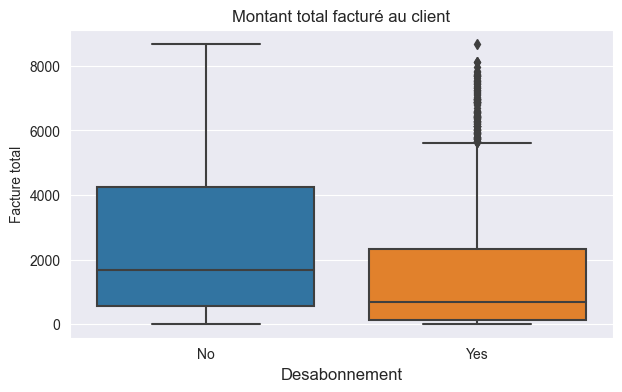

In [96]:
# TotaCharges VS Churn
sns.boxplot(x ='Churn', y = 'TotalCharges', data = df)
plt.xlabel('Desabonnement', size =12)
plt.ylabel('Facture total')
plt.title('Montant total facturé au client')
plt.show()

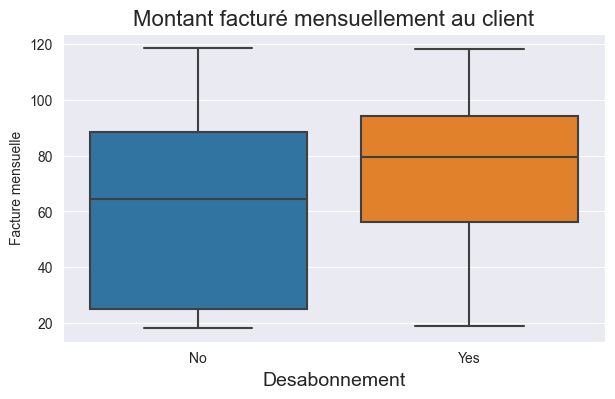

In [97]:
# MonthlyCharges VS Churn
sns.boxplot(x ='Churn', y = 'MonthlyCharges', data = df)
plt.xlabel('Desabonnement', size =14)
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client', size =16)
plt.show()

Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. Ce resultat est tout à fait normal, car plus un client reste longtemps fidèle à une entreprise, plus le montant total qui lui est facturé sur toute la période, est élevé.

Mais, le deuxième graphique montre que **les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui ne se sont pas désabonnés.** 

Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut être un facteur important qui détermine si un client va se désabonner ou non. Mais aussi, que l'entreprise à plus à gagner sur le long terme en fidélisant ses clients.

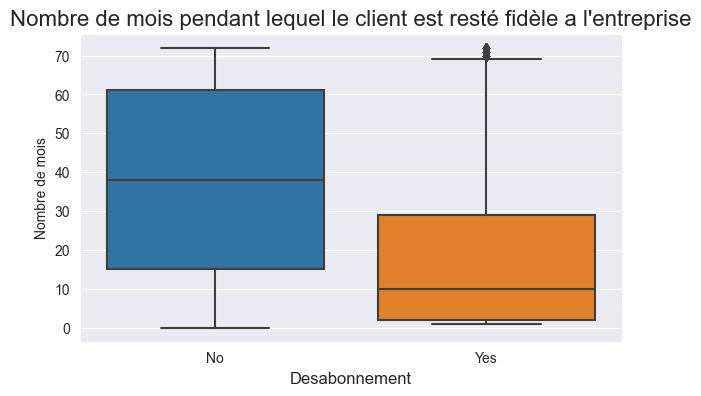

In [98]:
# tenure VS Churn
sns.boxplot(x ='Churn', y = 'tenure', data = df)
plt.xlabel('Desabonnement', size =12)
plt.ylabel('Nombre de mois')
plt.title("Nombre de mois pendant lequel le client est resté fidèle a l'entreprise", size =16)
plt.show()

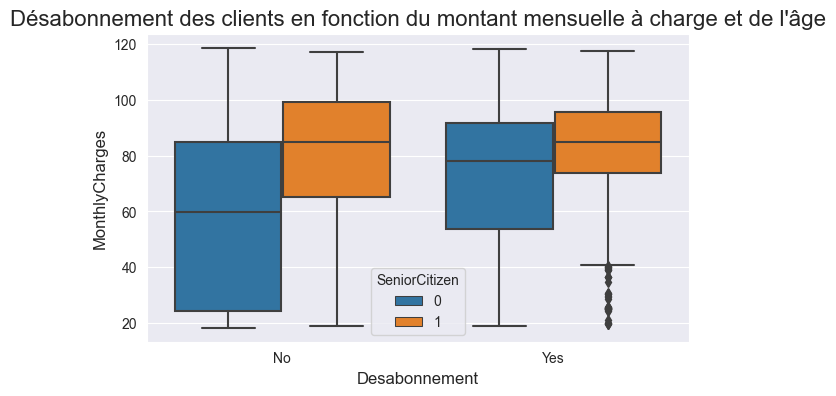

In [99]:
# MonthlyCharges VS Churn by SeniorCitizen
sns.boxplot( x = 'Churn', y = 'MonthlyCharges', data = df, hue = 'SeniorCitizen')
plt.xlabel('Desabonnement', size =12)
plt.ylabel('MonthlyCharges', size =12)
plt.title("Désabonnement des clients en fonction du montant mensuelle à charge et de l'âge", size =16)
plt.show()

Il semble que les personnes âgées soit beaucoup plus facturé mensuellemnt que les jeunes. Malgré cela, ils restent plus fidèles à l'entreprise que les jeunes.

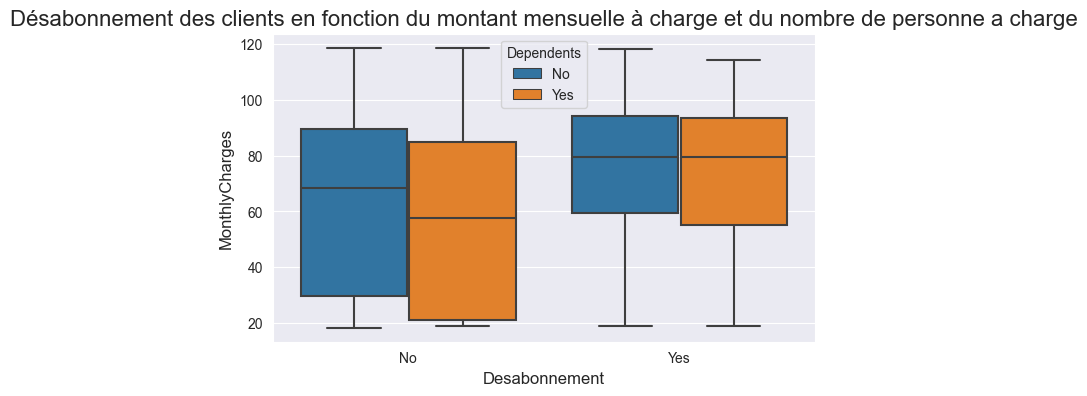

In [100]:
# MonthlyCharges VS Churn by Dependents
sns.boxplot( x = 'Churn', y = 'MonthlyCharges', data = df, hue = 'Dependents')
plt.xlabel('Desabonnement', size =12)
plt.ylabel('MonthlyCharges', size =12)
plt.title("Désabonnement des clients en fonction du montant mensuelle à charge et du nombre de personne a charge", size =16)
plt.show()

Resumé statistique

In [101]:
# Résumé statistique
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Comme vous l'avez remarqué, les trois variables quantitatives (**tenure, MonthlyCharges, et TotalCharges**) ont différentes échelles. tenure varie
entre 0 et 72 tandis que MonthlyCharges varie entre 18.25 et 118.75 et TotalCharges varie entre 18.8 et 8684.8. De nombreux modèles de
Machine et de Deep Learning fonctionnent mieux avec des variables standardisées ou normalisées.

Nous traiterons de la standardisation des données dans la section de prétraitement des données.

## Prétraitement des données

In [102]:
# Gestion des valeurs manquantes
data = df.copy()

# Nombre de valeurs manquantes par variable
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [103]:
# Suppression de valeurs manquantes
data.dropna(inplace = True)

Encodage des variables catégorielles

In [104]:
# Encodage de la variables binaire gender
data['gender'] = data['gender'].apply(lambda row: 1 if row == 'Male' else 0)

# Création d'une liste contenant tout les variables binaire excepter gender
binary_columns = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()
binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [105]:
# Encodage de la liste des variables binaire
for column in binary_columns:
  data[column] = data[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [106]:
# liste contenant les variables categorielles de plus de trois modalités
remaining_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()

#Encodage des variables categorielles restante
remaining_cat_vars_dummies = pd.get_dummies(data = data[remaining_cat_vars], columns = remaining_cat_vars, drop_first=True)

In [107]:
# Nouvelle dataframe
data = pd.concat([data['gender'], data[binary_columns], remaining_cat_vars_dummies, data[numerical_columns]], axis = 1)

# Affichage de la DataFrame
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65
5,0,0,0,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,8,99.65,820.50
6,1,0,0,1,1,1,0,0,1,1,...,0,0,0,0,1,0,0,22,89.10,1949.40
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,10,29.75,301.90
8,0,0,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,28,104.80,3046.05
9,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,62,56.15,3487.95


Nous avons vue que la variable **TotalCharge** est tres asymétrique alors transformons-la par une fonction racine carrée.

C:\Users\CEDRIC ANDERSON\AppData\Local\Temp\ipykernel_6968\3862350754.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TotalCharges'], kde = False);


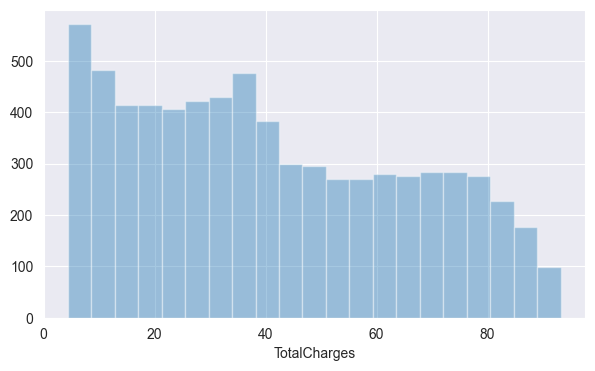

In [108]:
# Transformation de la variable 'TotalCharges'
data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Histogramme de la variables transformée
sns.distplot(data['TotalCharges'], kde = False);

In [109]:
# Coéfficient d'asymétrie de la variable 'TotalCharge' apres transformation
data['TotalCharges'].skew()

0.3089261418986736

In [110]:
# Données d'entrainement (60%), de test (20%) et de validation (20%)
X = data.drop('Churn', axis =1)
Y = data['Churn']

seed = 42

# Données d'entrainement (60%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=seed, test_size=0.4, stratify = Y)

# Données de validation(20%)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=seed, test_size=0.5, stratify = y_test)

# Affichage de la taille des données divisés
print("x_train taille :", x_train.shape)
print("y_train taille :", y_train.shape, '\n')
print("x_val taille :", x_val.shape)
print("y_val taille :", y_val.shape, '\n')
print("x_test taille :", x_test.shape)
print("y_test taille :", y_test.shape)


x_train taille : (4219, 30)
y_train taille : (4219,) 

x_val taille : (1406, 30)
y_val taille : (1406,) 

x_test taille : (1407, 30)
y_test taille : (1407,)


In [111]:
# Données d'entrainement (60%), de test (20%) et de validation (20%)
seed = 42

# Données d'entrainement (60%)
train, test = train_test_split(df, random_state=seed, test_size=0.4, stratify = df['Churn'])

# Données de validation(20%)
test, validation = train_test_split(test, random_state=seed, test_size=0.5, stratify = test['Churn'])

# Affichage de la taille des données divisés
print("train data_size :", train.shape)
print("validation data_size :", validation.shape)
print("test data_size :", test.shape)


# Enregistrement des different ensemble de données
train.to_csv('./data/train.csv', index=False)
validation.to_csv('./data/validation.csv', index=False)
test.to_csv('./data/test.csv', index=False)

train data_size : (4225, 21)
validation data_size : (1409, 21)
test data_size : (1409, 21)


Il faut s'assurer que les proportions de personnes ayant résilié ou non leur contrat soient les memes dans les différents ensemble de données.

In [112]:
# Fréquence des classes dans Y
pd.DataFrame(Y).value_counts(normalize = True)

Churn
0        0.734215
1        0.265785
dtype: float64

In [113]:
# Fréquence des classes dans y_train
pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.734297
1        0.265703
dtype: float64

In [114]:
# Fréquence des classes dans y_test
pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.734186
1        0.265814
dtype: float64

In [115]:
# Fréquence des classes dans y_val
pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.733997
1        0.266003
dtype: float64

On a la même distribution des classe dans la repartition de nos données

Attaquons-nous maintenant au problème de déséquilibre de classe dans les données.
Lorsqu'il y a une très grande différence entre le nombre d'observations dans chaque catégorie de la variable cible à prédire, cela peut entraîner
des erreurs de modélisation.
Dans notre cas ici, il y a un peu plus de 73% de personnes qui n'ont pas résilié leur abonnement contre environ un peu plus de 26% qui ont résilié
leur abonnement. Il y a donc un grand déséquilibre de classe. 

Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégorie de la variable cible : 
* Soit on crée plus d'observations dans la classe minoritaire (modalité **1**) c'est-à-dire on fait un sur-échantillonnage,
* soit on diminue les observations de la classe majoritaire (modalité **O**) c'est-à-dire un sous-échantillonnage.

Appliquons la méthode de sur_échantillonnage sur la classe minoritaire

In [116]:
# Résolution du problème de désequilibre de classe : Méthode de sur_échantillonnage de la classe  minoritaitre
X2 = x_train
X2['Churn'] = y_train.values

# Definition des classes
minority = X2[X2['Churn']==1] 
majority = X2[X2['Churn']==0]

# Augmentation des observations de la classe minoritaire
minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state = seed)

# Concatenation de la classe minoritaire et majoritaire
upsample = pd.concat([majority, minority_upsampled])

# Affichage des classes de la DataFrame sur_échantillonées
upsample['Churn'].value_counts()

0    3098
1    3098
Name: Churn, dtype: int64

In [117]:
# Données d'entrainement sur la base de la méthode de sur_échantillonnage
x_train_up = upsample.drop('Churn', axis = 1)
y_train_up = upsample['Churn']

Appliquons la méthode de sous_échantillonnage sur la classe majoritaire

In [118]:
# Diminution des observations de la classe majoritaire
majority_downsampled = resample(majority, replace = True, n_samples = len(minority), random_state = seed)

# Concatenation de la classe minoritaire et majoritaire
downsample = pd.concat([minority, majority_downsampled])

# Affichage des classes de la DataFrame sous_échantillonées
downsample['Churn'].value_counts()

1    1121
0    1121
Name: Churn, dtype: int64

In [119]:
# Données d'entrainement sur la base de la méthode de sous_échantillonnage
x_train_down = downsample.drop('Churn', axis = 1)
y_train_down = downsample['Churn']

In [120]:
# Rédimensionnement de y_train et x_train
y_train = x_train['Churn']
x_train = x_train.drop('Churn', axis = 1)

On à maintenant trois types de données sur lesquel entrainer notre algorithme de machine learning. 

* Les données obtenue à partir de la méthode de sur_échantillonnage (x_train_up, y_train_up), 
* les données obtenue par la méthode de sous_échantillonnage (x_train_down, y_train_down) et 
* les données originelle (x_train et y_train)

Nous allons commencer par entrainer le modèle sur les données sur_échantillonnées

In [121]:
# Définition des données d'entrainements
train_features = x_train_up
train_labels = y_train_up

Passons maintenant à la normalisation des données

In [122]:
# Normalisation des variables independantes des différente ensemble de données
scaler = MinMaxScaler()

# Normalisation des données échantillonnées
mode_scaler = scaler.fit(train_features)
train_features = mode_scaler.transform(train_features)

# Normalisation des données de validation
x_val = mode_scaler.transform(x_val)

# Normalisation des données d'entrainement
x_test = mode_scaler.transform(x_test)


# Retransformation en DataFrame
train_features = pd.DataFrame(train_features, columns = X.columns)
x_val = pd.DataFrame(x_val, columns = X.columns)
x_test = pd.DataFrame(x_test, columns = X.columns)

In [123]:
# Verifions si toute les valeurs sont entre 0 et 1
train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,6196.000000,6196.0,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,...,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,0.504035,0.0,0.440768,0.254358,0.907844,0.652356,0.092156,0.433021,0.520497,0.166398,...,0.166398,0.396869,0.164300,0.175274,0.185604,0.413008,0.213525,0.376245,0.493943,0.378641
std,0.500024,0.0,0.496519,0.435535,0.289270,0.476261,0.289270,0.495534,0.499620,0.372467,...,0.372467,0.489288,0.370577,0.380232,0.388818,0.492414,0.409828,0.338781,0.289249,0.275496
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056338,0.268463,0.136900
50%,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281690,0.561876,0.329658
75%,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.676056,0.731786,0.602778
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 Passons maintenant a la modélisation

## Modélisation

### Choix de la métrique d'évaluation de performance du modèle

**Quelle metrique choisir pour évaluer la performance des modèles ?**

Qu'est ce qu'une matrice de confusion ?

<img src="https://interactivechaos.com/sites/default/files/inline-images/confusion_matrix_sklearn.png" width="900" height="500">

La matrice de confusion est une matrice carrée qui rapporte le nombre de vrais positifs (True Positives ou TP), vrais négatifs (True Négatives ou
TN), faux positifs (False Positive ou FP) et faux négatifs (False Negatives ou FN).

Dans notre cas, le positif c'est 1 : le client s'est désabonné et le négatif c'est 0 : le client ne s'est pas désabonné.
* TP: le client s'est désabonné et le modèle prédit qu'il s'est désabonné ;
* TN: le client ne s'est pas désabonné et le modèle prédit qu'il ne s'est pas désabonné.
Les 2 cas ci-dessus (TP et TN) sont les bons cas. Mais FP et FN sont les mauvais cas :
* FP : le client ne s'est pas désabonné et le modèle prédit qu'il s'est désabonné;
* FN : le client s'est désabonné et le modèle prédit qu'il ne s'est pas désabonné.

Les choix de métrique :https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

A partir de la matrice de confusion, nous pouvont calculer certaines métriques pour évaluer la performance du modèle.
    
* La précision de la classification (Accuracy en anglais) est le pourcentage d'instances correctement classifiées, c'est-à-dire la somme du nombre de vrais négatifs et de vrais positifs divisée par le nombre total des observations. Elles se calcule donc par la formule ci-dessous :

**Accuracy** = $\frac{TN + TP}{TN + FN + FP+ TP}$

faut faire attention à la précision globale. Une forte précision globale ne signifie pas forcément que le modèle est performant. Le choix de la
métrique pour quantifier la performance du modèle doit se faire en fonction du contexte de l'étude, c'est-à-dire de la problématique qu'on veut résoudre.

Lorsqu'il y a un problème de déséquilibre de classe, la précision globale n'est pas une bonne métrique d'évaluation de la performance du
modèle.

precision et recall sont des métriques très utilisées surtout lorsque les classes de la variable cible sont très déséquilibrées.
* precision : La précision est l'indicateur qui vous indique, sur tous les points positifs prédits, combien étaient de vrais positifs

**Precision** = $\frac{TP}{ TP + FP}$ 


recall : cette métrique montre la capacité du modèle à identifier tous les vrais positifs TP

**Recall** = $\frac{TP}{TP + FN}$ 

L'amélioration de la precision diminue le recall et vice-versa. Alors que faire ?

Fort heureusement, il y a une métrique qui contient à la fois la sensibilité et la spécificité. C'est le F1 score.
* F1 score : Moyenne harmonique de precision et de recall. Elle se calcule donc par la formule :


**F1_score** = $2*\frac{precision * recall}{precision + recall}$ 

Pour un modèle parfait, f1 score est égale à 1 et la plus mauvaise performance est un modèle avec un f1 score égale à 0.

Nous choisissons le F1_score pour évaluer la performance de chaque modèle qui sera construit.

In [124]:
# Slection des meilleurs variables predictrices
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1032
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1406
   macro avg       0.71      0.69      0.70      1406
weighted avg       0.77      0.78      0.77      1406



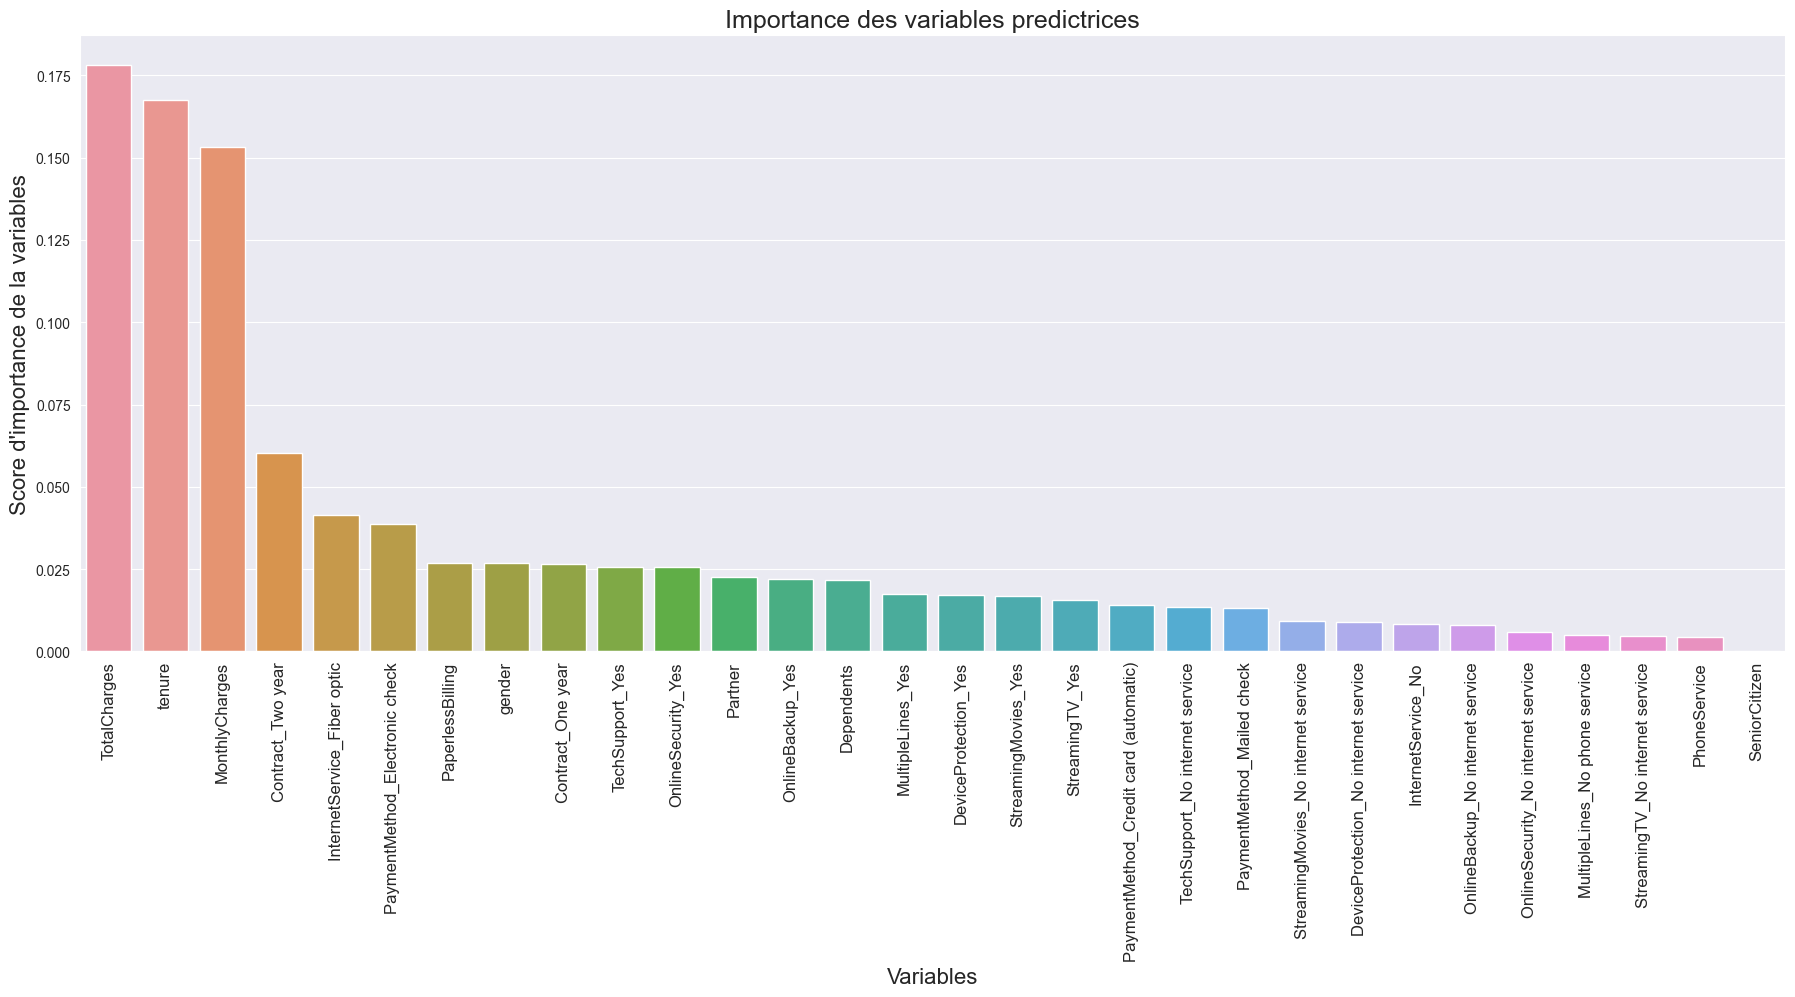

In [125]:
# Importance des variables indépendantes
vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending = False)

# Affichage du graphique de l'importance des variables predictrices
plt.figure(figsize=(22,8))
sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel("Variables", fontsize = 16)
plt.ylabel("Score d'importance de la variables", fontsize = 16)
plt.title("Importance des variables predictrices", size = 18)
plt.show()

In [126]:
# Affichage des valeur de vars_imp
vars_imp

TotalCharges                             0.178269
tenure                                   0.167561
MonthlyCharges                           0.153233
Contract_Two year                        0.060127
InternetService_Fiber optic              0.041571
PaymentMethod_Electronic check           0.038654
PaperlessBilling                         0.026993
gender                                   0.026971
Contract_One year                        0.026657
TechSupport_Yes                          0.025780
OnlineSecurity_Yes                       0.025631
Partner                                  0.022540
OnlineBackup_Yes                         0.021949
Dependents                               0.021825
MultipleLines_Yes                        0.017538
DeviceProtection_Yes                     0.017150
StreamingMovies_Yes                      0.016694
StreamingTV_Yes                          0.015699
PaymentMethod_Credit card (automatic)    0.014208
TechSupport_No internet service          0.013414


In [127]:
# Variables selectionnées pour les algorithmes
seuil = 0.004
vars_select = vars_imp[vars_imp > seuil].index.to_list()

# Reduction des données d'entrainement aux variables selectionnées
train_features = train_features[vars_select]
x_val = x_val[vars_select]
x_test = x_test[vars_select]

In [128]:
# Nombre de variables predictrices
print('Nombres de variables selectionnées :', len(vars_select))

Nombres de variables selectionnées : 29


Notre objectif est de construire un modèle de classification qui prédit si un client va se désabonner ou non. Nous utiliserons différents
algorithmes **(Logistic Regression, Random Forest, Gradient Boosting, Classificateur Perceptron Multicouche et Support Vector Machine)** afin de
comparer leurs performances et de choisir le meilleur modèle.

## Modèle de Regression logistique

In [129]:
# Dictionnaire des hyper_parametres
param_grid = {'C' :[0.001, 0.01, 1, 10, 50, 100, 500]}

# Objet GridSearchCV
grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state = seed, max_iter = 500),
                                 param_grid = param_grid,
                                 scoring = 'f1',
                                 cv = 5)

# Entrainement de l'algorithme
logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Meilleurs score et meilleurs hyper_parametre
print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.777
LogisticRegression(C=100, max_iter=500, random_state=42)


Le modèle a un bon score d'entrainement. Evaluons sa performance sur les données de validation afin d'apprecier sa capacité à généraliser sur de nouvelles données

In [130]:
# Fonction d'évaluation de la performance d'un modèle
def model_evaluation(model, features, labels):
  y_pred = model.predict(features)
  print(classification_report(labels, y_pred))


In [131]:
# Evaluation du modèle de Regression logistique
model_evaluation(logreg_model.best_estimator_, x_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1032
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1406
   macro avg       0.71      0.76      0.71      1406
weighted avg       0.80      0.74      0.76      1406



Appliquons l'algorithme Recursive Feature Eliminator **(RFE)** sur le modèle afin de voir s'il garde les mêmes performances lorsqu'on réduit le
nombre de predicteurs. 
En effet, plus le modèle est complexe, plus il est difficile de l'interpréter.

In [132]:
# Création d'une fonction de construction d'un modèle avec utilisation de  l'algorithme RFE
def model_with_rfe(model):
  rfe_model = RFE(estimator = model, verbose = 0)
  rfe_model.fit(train_features, train_labels)
  mask = rfe_model.support_
  reduced_x = train_features.iloc[:, mask]
  print(reduced_x.columns)
  return rfe_model


In [133]:
# Logistic Regression RFE
rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)
rfe_logreg_model

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaperlessBilling', 'Contract_One year',
       'MultipleLines_Yes', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'TechSupport_No internet service',
       'StreamingMovies_No internet service', 'InternetService_No',
       'StreamingTV_No internet service'],
      dtype='object')


RFE(estimator=LogisticRegression(C=100, max_iter=500, random_state=42))

In [134]:
# Evaluation des performances du modele de regression logistique avec RFE
model_evaluation(rfe_logreg_model.estimator, x_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1032
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1406
   macro avg       0.71      0.76      0.71      1406
weighted avg       0.80      0.74      0.76      1406



Le RFE à reduit le nombre de prédicteurs de 28 à 14 et n'as pas amélioré la performance du modèle.

Passons à l'algorithme de forêt aléatoire

## Model de Forêt aléatoire

In [135]:
# Dictionnaire des hyper_parametres
param_grid_rf = {'n_estimators' :[10, 50, 100, 500, 1000], 'max_depth' :[3, 5, 100, 500]}

# Objet GridSearchCV
grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state = seed),
                                 param_grid = param_grid_rf,
                                 scoring = 'f1',
                                 cv = 5)

# Entrainement de l'algorithme
rf_model = grid_rf_class.fit(train_features, train_labels)

# Meilleurs score et meilleurs hyper_parametre
print(round(rf_model.best_score_, 3))

print(rf_model.best_estimator_)

0.914
RandomForestClassifier(max_depth=100, random_state=42)


In [136]:
# Evaluation du modèle de Forêt aléatoire
model_evaluation(rf_model.best_estimator_, x_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1032
           1       0.60      0.53      0.57       374

    accuracy                           0.78      1406
   macro avg       0.72      0.70      0.71      1406
weighted avg       0.78      0.78      0.78      1406



Comparé aux valeurs du model de Regression logistique, le modèle de Forêt aléatoire semble moins éfficace pour prédire la classe **1**

Appliquons une RFE

In [137]:
# RandomForest avec RFE
rfe_rf_model = model_with_rfe(rf_model.best_estimator_)
rfe_rf_model

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'PaperlessBilling', 'gender', 'Contract_One year', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'Partner', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=100, random_state=42))

In [138]:
# Evaluation des performances du RandomForest avec RFE
model_evaluation(rfe_rf_model.estimator, x_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1032
           1       0.60      0.53      0.57       374

    accuracy                           0.78      1406
   macro avg       0.72      0.70      0.71      1406
weighted avg       0.78      0.78      0.78      1406



Au vu de ses résultats, nous rétiendrons le modèle de forêt aléatoire obtenu sans RFE.

Passons à la construction d'un modèle de réseau de neuronne artificiel.

## Classificateur Perceptron multicouche

In [139]:
# MLPClassifier
mlp = MLPClassifier(random_state = seed, max_iter = 1000)

# Definition des hyper_parametres
parameters = {'hidden_layer_sizes' :[(50,) , (100,), (200,)],
              'learning_rate' :['constant', 'invscaling', 'adaptive']},
              

# Recherche des hyperparametres
mlp_cv = GridSearchCV(mlp, parameters, scoring='f1', cv=5, n_jobs=-1)

# Entrainement du modèle
mlp_cv.fit(train_features, train_labels)


# Meilleurs score et meilleurs hyper_parametre
print(round(mlp_cv.best_score_, 3))
print(mlp_cv.best_estimator_)

0.862
MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42)


In [140]:
# Evaluation du modele Perceptron
model_evaluation(mlp_cv.best_estimator_, x_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1032
           1       0.49      0.62      0.55       374

    accuracy                           0.73      1406
   macro avg       0.67      0.70      0.68      1406
weighted avg       0.75      0.73      0.74      1406



Passons maintenant à un modèle SVM (Support Vector Machine).

## Support Vector Machine (SVM)

In [141]:
# Support Vector Machine : Classificateur qui trouve l'hyperplan optimal qui maximise la frontière entre 2 classes
svm_model = SVC(random_state = seed)

# Dictionnaire des hyper_parametres
svm_hyp = {'C' :[1, 10, 50, 100],
             'kernel' :['linear', 'rbf']}

# Objet GridSearchCV
svm_cv = GridSearchCV(svm_model,
                   svm_hyp,
                   scoring = 'f1',
                   cv = 5)
                              

# Entrainement de l'algorithme
svm_model = svm_cv.fit(train_features, train_labels)

# Meilleurs score et meilleurs hyper_parametre
print(round(svm_model.best_score_, 3))

print(svm_model.best_estimator_)

0.855
SVC(C=100, random_state=42)


In [142]:
# Evaluation des performances du RandomForest avec RFE
model_evaluation(svm_model.best_estimator_, x_val, y_val)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1032
           1       0.48      0.61      0.54       374

    accuracy                           0.72      1406
   macro avg       0.66      0.68      0.67      1406
weighted avg       0.75      0.72      0.73      1406



## Choix du meilleurs modèle

Nous avons utilisé les données d'évaluation pour sélectionner le meilleur modèle. Ensuite nous évaluons le meilleur modèle sélectionné sur les
données de test afin d'apprécier sa performance sur de nouvelles données. Idéalement les performances de ce modèle sur les données
dévaluation et sur les données de test doivent étre relativement proches.

In [153]:
# Performance du meilleur modèle sur les données de test
model_evaluation(logreg_model.best_estimator_, x_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [149]:
# Enregistrement du modele dans un fichier pickle
joblib.dump(logreg_model,'./models/logreg_model.joblib')

['./models/logreg_model.joblib']

In [154]:
# Chargement du modele
loaded_model = joblib.load('./models/logreg_model.joblib')
loaded_model

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid={'C': [0.001, 0.01, 1, 10, 50, 100, 500]},
             scoring='f1')

## Conclusion

<img src="https://cdn.pixabay.com/photo/2015/11/03/08/58/meeting-1019875_960_720.jpg" width="750" height="350">





Dans ce projet Customer Churn, nous avons appris à :

* Comprendre une problematique business sur le Customer Churn
* Proceder à une analyse exploratoire des données
* Proceder au netoyage des données
* Gerer les données manquantes et aberantes
* Tirer des informations utile pour le pretraitement
* Diviser les données en test, validation et entrainement
* Regler un probleme de desequilibre de classe
* Utiliser different modele de machine learning
* Choisir la metric approprié en fonction de la problematique business
* Choisir le meilleur modele (le plus performant) parmis les model construit
* Choisir les predicteurs les plus performant a la formation d'un modele
* Deployer le modele dans une application web 